# Generating WFX files from other computational software output

Many different versions of computational software for electronic structure calculations are in use. Should you wish to run AIM calculations, but may not have wfx files as the output of this software, `aiida-aimall` provides functionality to generate wfx files from some output and automatically run AIM calculations on the outputs in the [GenerateWFXToAIMWorkchain](../reference/api/auto/aiida_aimall/workchains/index.rst#aiida_aimall.workchains.GenerateWFXToAIMWorkchain). To do this, we use the `qc-iodata` package of Paul Ayer's Horton software

Supported output file formats are:
 * Molden
 * fchk
 * cp2k

## Only Generating wfx file

Molden files can be produced by numerous software suites such as Molpro, Orca, PSI4, Molden and Turbomole. Provided in `aiida-aimall` is a workchain to generate the wfx from these files and automatically create an AimqbCalculation for it. However, should one desire only the wfx file, you can run  `iodata-convert` to convert the file locally. Should you desire the wfx file to be in the AiiDA database, the authors suggest making use of `aiida-shell`, as follows. You can change output.wfx in BOTH the `arguments` AND `outputs` to match the filename you desire.

```python
from aiida_shell import launch_shell_job
from aiida.orm import SinglefileData

in_file = SinglefileData('/path/to/your/.molden.input')
_, node = launch_shell_job(
            'iodata-convert',
            arguments='{file} output.wfx',
            nodes={"file": in_file},
            outputs=['output.wfx'],
            submit=True,
        )
```


## Workflow for generating wfx and running AIM

In [3]:
from aiida import load_profile
from aiida.plugins import WorkflowFactory, DataFactory
from aiida.orm import load_node,load_code
from aiida.engine import submit

load_profile()
GenerateWFXToAIMWorkChain = WorkflowFactory("aimall.wfxtoaim")
AimqbParameters = DataFactory("aimall.aimqb")
# predefined Molden input file in database
single_file = load_node(114541)
aim_params = AimqbParameters({"naat": 2, "nproc": 2, "atlaprhocps": True})
aim_code = load_code("aimall@localhost")
builder = GenerateWFXToAIMWorkChain.get_builder()
builder.input_file = single_file
builder.aim_params = aim_params
builder.aim_code = aim_code
submit(builder)


<WorkChainNode: uuid: f2dccfa8-d1b5-4f66-a193-12fd7fd605d6 (pk: 116427) (aiida.workflows:aimall.wfxtoaim)>

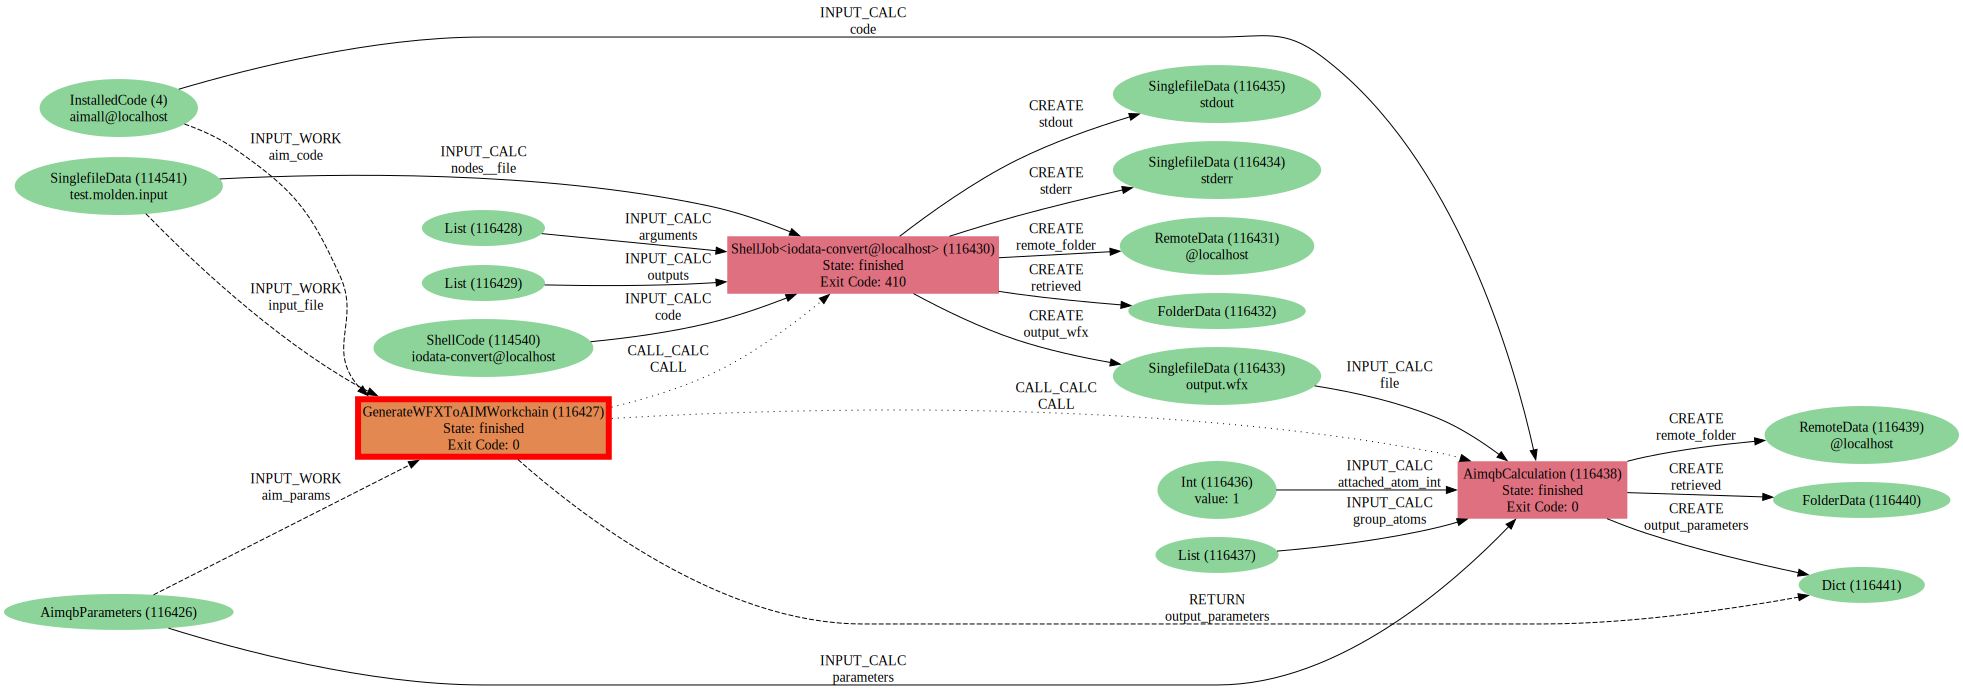

In [4]:
from aiida.tools.visualization import Graph
graph = Graph(graph_attr={"size": "6,6!", "rankdir": "LR"})
graph = Graph(graph_attr={"rankdir": "LR"})
graph.recurse_descendants(
    116427,
    origin_style=None,
    include_process_inputs=True,
    annotate_links="both"
)
graph.graphviz

Here we can view the provenance for the [AimqbCalculations](../reference/api/auto/aiida_aimall/calculations/index.rst#aiida_aimall.calculations.AimqbCalculation) generated after creating the wfx file with `iodata-convert` through `aiida_shell`. Note that in this instance the `ShellJob` has an exit code 410 due to some stderr being printed. The error displayed is just a notice regarding `iodata-convert` fixing the incorrect Molden format that was generated by Orca.